In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### **2. DATA UNDERSTANDING**


The dataset has information of 100k orders from 2016 to 2018 made in several markets in Brazil. This is real commercial data, it has been anonymized.

This dataset is generously provided by Olist, the largest department store on the Brazilian market. Olist connects small businesses from all over Brazil to the channel without any hassle and with one contract. The merchant can sell their products through the Olist Store and have them shipped directly to the customer using the Olist logistics partner. Once the customer purchases the product from the Olist Store, the seller will be notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey via email where he or she can provide a note for the purchase experience and some comments.

source of data : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

##### **2.1. Pre-Joining Understanding**

 The process involves examining the structure, data types, and quality of each dataset to identify any issues like missing values or inconsistencies. By understanding the data at this stage, we ensure that the joining process is smooth and that the final combined dataset is accurate and ready for deeper analysis.

    2.1.1. Importing Datasets

In [31]:
customers = pd.read_csv('./Dataset/olist_customers_dataset.csv')
items = pd.read_csv('./Dataset/olist_order_items_dataset.csv')
payments = pd.read_csv('./Dataset/olist_order_payments_dataset.csv')
reviews = pd.read_csv('./Dataset/olist_order_reviews_dataset.csv')
orders= pd.read_csv('./Dataset/olist_orders_dataset.csv')
products = pd.read_csv('./Dataset/olist_products_dataset.csv')
sellers= pd.read_csv('./Dataset/olist_sellers_dataset.csv')
category = pd.read_csv('./Dataset/product_category_name_translation.csv')

    2.1.2. Customers Dataset

In [32]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [33]:
pd.DataFrame({
    'column_name': customers.columns.values,
    'data_type': customers.dtypes.values,
    'n_rows': customers.count().values,
    'Duplicate': customers.duplicated().sum(),
    'null_value': customers.isnull().sum().values,
    'null_value_percent': [(val / len(customers) * 100) for val in customers.isnull().sum().values],
    'n_unique': customers.nunique().values,
    'sample_n_unique': [customers[col].unique() for col in customers.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
0,customer_id,object,99441,0,0,0.0,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,object,99441,0,0,0.0,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_zip_code_prefix,int64,99441,0,0,0.0,14994,"[14409, 9790, 1151, 8775, 13056, 89254, 4534, ..."
3,customer_city,object,99441,0,0,0.0,4119,"[franca, sao bernardo do campo, sao paulo, mog..."
4,customer_state,object,99441,0,0,0.0,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."


- Data Consist of 5 Column with number of rows 99441.
- There are no missing values and no duplicated data, further investigation will be provided after joining dataset 
- The customer_unique_id has number of unique 96096
- Customer state has 27 number of unique value and Customer City has 

| Columns Name             | Description                                                                                                     |
|--------------------------|-----------------------------------------------------------------------------------------------------------------|
| `customer_id`            | Key to the orders dataset. Each order has a unique customer_id                                                  |
| `customer_unique_id`     | Unique identifier for each customer across orders (i.e., if a customer makes multiple orders, they have the same customer_unique_id) |
| `customer_zip_code_prefix` | First five digits of the customer's zip code                                                                    |
| `customer_city`          | Customer city name                                                                                              |
| `customer_state`         | Customer state                                                                                                  |


    2.1.3. Items Dataset

In [34]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [35]:
pd.DataFrame({
    'column_name': items.columns.values,
    'data_type': items.dtypes.values,
    'n_rows': items.count(),
    'Duplicate': items.duplicated().sum(),
    'null_value': items.isnull().sum().values,
    'null_value_percent': [(val / len(items) * 100) for val in items.isnull().sum().values],
    'n_unique': items.nunique().values,
    'sample_n_unique': [items[col].unique() for col in items.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
order_id,order_id,object,112650,0,0,0.0,98666,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f..."
order_item_id,order_item_id,int64,112650,0,0,0.0,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
product_id,product_id,object,112650,0,0,0.0,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802..."
seller_id,seller_id,object,112650,0,0,0.0,3095,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b..."
shipping_limit_date,shipping_limit_date,object,112650,0,0,0.0,93318,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201..."
price,price,float64,112650,0,0,0.0,5968,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,..."
freight_value,freight_value,float64,112650,0,0,0.0,6999,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11...."


- Data Consists of 7 Columns with a total of 112,650 rows.
- There are no missing values and no duplicated data, further investigation will be provided after joining dataset 
- The product_id column has 32,951 unique values which explain represent total product sell on ecommerce
- The seller_id column has 3,095 unique values which represent number of seller itself on ecommerce
- The order_item_id column has 21 unique values which represent there is a customer ordered the same product in within same order

| Columns Name           | Description                                                                                                                 |
|------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| `order_id`             | Order unique identifier                                                                                                     |
| `order_item_id`        | Sequential number identifying number of items included in the same order                                                    |
| `product_id`           | Product unique identifier                                                                                                   |
| `seller_id`            | Seller unique identifier                                                                                                    |
| `shipping_limit_date`  | Shows the seller shipping limit date for handling the order over to the logistic partner                                     |
| `price`                | Item price                                                                                                                  |
| `freight_value`        | Item freight value (if an order has more than one item, the freight value is split between items)                           |


    2.1.4. Payments Dataset

In [36]:
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [37]:
pd.DataFrame({
    'column_name': payments.columns.values,
    'data_type': payments.dtypes.values,
    'n_rows': payments.count(),
    'Duplicate': payments.duplicated().sum(),
    'null_value': payments.isnull().sum().values,
    'null_value_percent': [(val / len(payments) * 100) for val in payments.isnull().sum().values],
    'n_unique': payments.nunique().values,
    'sample_n_unique': [payments[col].unique() for col in payments.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
order_id,order_id,object,103886,0,0,0.0,99440,"[b81ef226f3fe1789b1e8b2acac839d17, a9810da8291..."
payment_sequential,payment_sequential,int64,103886,0,0,0.0,29,"[1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1..."
payment_type,payment_type,object,103886,0,0,0.0,5,"[credit_card, boleto, voucher, debit_card, not..."
payment_installments,payment_installments,int64,103886,0,0,0.0,24,"[8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24..."
payment_value,payment_value,float64,103886,0,0,0.0,29077,"[99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8..."


- Data Consists of 5 Columns with a total of 103,886 rows
- There are no missing values and no duplicated data, further investigation will be provided after joining dataset 
- The payment_sequential column has 29 unique values, indicating the sequence of payments for an order.
- The payment_type column has 5 unique values, representing the different methods of payment used.
- The payment_installments column has 24 unique values, showing the variety in the number of installments chosen by customers.
- The payment_value column has 29,077 unique values, reflecting the diversity in transaction amounts.

| Columns Name           | Description                                                                                                      |
|------------------------|------------------------------------------------------------------------------------------------------------------|
| `order_id`             | Unique identifier of an order.                                                                                   |
| `payment_sequential`   | A customer may pay an order with more than one payment method. If they do so, a sequence will be created.        |
| `payment_type`         | Method of payment chosen by the customer.                                                                        |
| `payment_installments` | Number of installments chosen by the customer.                                                                   |
| `payment_value`        | Transaction value.                                                                                               |


    2.1.5. Reviews Dataset

In [38]:
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [39]:
pd.DataFrame({
    'column_name': reviews.columns.values,
    'data_type': reviews.dtypes.values,
    'n_rows': reviews.count(),
    'Duplicate': reviews.duplicated().sum(),
    'null_value': reviews.isnull().sum().values,
    'null_value_percent': [(val / len(reviews) * 100) for val in reviews.isnull().sum().values],
    'n_unique': reviews.nunique().values,
    'sample_n_unique': [reviews[col].unique() for col in reviews.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
review_id,review_id,object,99224,0,0,0.000000,98410,"[7bc2406110b926393aa56f80a40eba40, 80e641a11e5..."
order_id,order_id,object,99224,0,0,0.000000,98673,"[73fc7af87114b39712e6da79b0a377eb, a548910a1c6..."
review_score,review_score,int64,99224,0,0,0.000000,5,"[4, 5, 1, 3, 2]"
review_comment_title,review_comment_title,object,11568,0,87656,88.341530,4527,"[nan, recomendo, Super recomendo, Não chegou m..."
review_comment_message,review_comment_message,object,40977,0,58247,58.702532,36159,"[nan, Recebi bem antes do prazo estipulado., P..."
review_creation_date,review_creation_date,object,99224,0,0,0.000000,636,"[2018-01-18 00:00:00, 2018-03-10 00:00:00, 201..."
review_answer_timestamp,review_answer_timestamp,object,99224,0,0,0.000000,98248,"[2018-01-18 21:46:59, 2018-03-11 03:05:13, 201..."


- Data Consists of 7 Columns with a total of 99,224 rows
- The review_score column has 5 unique values, reflecting the different scores given by customers (from 1 to 5).
- There is a high missing value on review id and review comment, this will treat later after joining due to lack information because the dataset should be linked with other dataset.
- No duplicated row is found but further investigation will be provided after joining dataset 

| Columns Name            | Description                                                                                       |
|-------------------------|---------------------------------------------------------------------------------------------------|
| `review_id`             | Unique review identifier.                                                                        |
| `order_id`              | Unique order identifier.                                                                         |
| `review_score`          | Note ranging from 1 to 5 given by the customer on a satisfaction survey.                         |
| `review_comment_title`  | Comment title from the review left by the customer, in Portuguese.                               |
| `review_comment_message`| Comment message from the review left by the customer, in Portuguese.                             |
| `review_creation_date`  | Shows the date in which the satisfaction survey was sent to the customer.                         |
| `review_answer_timestamp`| Shows satisfaction survey answer timestamp.                                                       |


    2.1.6. Orders Dataset

In [40]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [41]:
pd.DataFrame({
    'column_name': orders.columns.values,
    'data_type': orders.dtypes.values,
    'n_rows': orders.count(),
    'Duplicate': orders.duplicated().sum(),
    'null_value': orders.isnull().sum().values,
    'null_value_percent': [(val / len(orders) * 100) for val in orders.isnull().sum().values],
    'n_unique': orders.nunique().values,
    'sample_n_unique': [orders[col].unique() for col in orders.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
order_id,order_id,object,99441,0,0,0.000000,99441,"[e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc..."
customer_id,customer_id,object,99441,0,0,0.000000,99441,"[9ef432eb6251297304e76186b10a928d, b0830fb4747..."
order_status,order_status,object,99441,0,0,0.000000,8,"[delivered, invoiced, shipped, processing, una..."
order_purchase_timestamp,order_purchase_timestamp,object,99441,0,0,0.000000,98875,"[2017-10-02 10:56:33, 2018-07-24 20:41:37, 201..."
order_approved_at,order_approved_at,object,99281,0,160,0.160899,90733,"[2017-10-02 11:07:15, 2018-07-26 03:24:27, 201..."
order_delivered_carrier_date,order_delivered_carrier_date,object,97658,0,1783,1.793023,81018,"[2017-10-04 19:55:00, 2018-07-26 14:31:00, 201..."
order_delivered_customer_date,order_delivered_customer_date,object,96476,0,2965,2.981668,95664,"[2017-10-10 21:25:13, 2018-08-07 15:27:45, 201..."
order_estimated_delivery_date,order_estimated_delivery_date,object,99441,0,0,0.000000,459,"[2017-10-18 00:00:00, 2018-08-13 00:00:00, 201..."


- Data Consists of 8 Columns with a total of 99,441 rows.
- The order_status column has 8 unique values, reflecting different order statuses such as 'delivered', 'shipped', 'processing' and others.
- There is a low missing value below 3 %, this will treat later after joining due to lack information because the dataset should be linked with other dataset.
- No duplicated row is found but further investigation will be provided after joining dataset 

| Columns Name                   | Description                                                                                           |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| `order_id`                     | Unique identifier of the order.                                                                      |
| `customer_id`                  | Key to the customer dataset. Each order has a unique `customer_id`.                                  |
| `order_status`                 | Reference to the order status (delivered, shipped, etc).                                             |
| `order_purchase_timestamp`     | Shows the purchase timestamp.                                                                        |
| `order_approved_at`            | Shows the payment approval timestamp.                                                                 |
| `order_delivered_carrier_date` | Shows the order posting timestamp. When it was handled to the logistic partner.                       |
| `order_delivered_customer_date`| Shows the actual order delivery date to the customer.                                                  |
| `order_estimated_delivery_date`| Shows the estimated delivery date that was informed to the customer at the purchase moment.            |


    2.1.7. Products Dataset

In [42]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [43]:
pd.DataFrame({
    'column_name': products.columns.values,
    'data_type': products.dtypes.values,
    'n_rows': products.count(),
    'Duplicate': products.duplicated().sum(),
    'null_value': products.isnull().sum().values,
    'null_value_percent': [(val / len(products) * 100) for val in products.isnull().sum().values],
    'n_unique': products.nunique().values,
    'sample_n_unique': [products[col].unique() for col in products.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
product_id,product_id,object,32951,0,0,0.000000,32951,"[1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb..."
product_category_name,product_category_name,object,32341,0,610,1.851234,73,"[perfumaria, artes, esporte_lazer, bebes, util..."
product_name_lenght,product_name_lenght,float64,32341,0,610,1.851234,66,"[40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57...."
product_description_lenght,product_description_lenght,float64,32341,0,610,1.851234,2960,"[287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127..."
product_photos_qty,product_photos_qty,float64,32341,0,610,1.851234,19,"[1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ..."
product_weight_g,product_weight_g,float64,32949,0,2,0.006070,2204,"[225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18..."
product_length_cm,product_length_cm,float64,32949,0,2,0.006070,99,"[16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40...."
product_height_cm,product_height_cm,float64,32949,0,2,0.006070,102,"[10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1..."
product_width_cm,product_width_cm,float64,32949,0,2,0.006070,95,"[14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40...."


- Data Consists of 9 Columns with a total of 32,951 rows.
- The product_category_name column has 73 unique values, indicating different product categories.
- There is a low missing value below 3 %, this will treat later after joining due to lack information because the dataset should be linked with other dataset.
- No duplicated row is found but further investigation will be provided after joining dataset 


| Columns Name                  | Description                                               |
|-------------------------------|-----------------------------------------------------------|
| `product_id`                  | Unique product identifier.                              |
| `product_category_name`       | Root category of product, in Portuguese.                |
| `product_name_lenght`         | Number of characters extracted from the product name.   |
| `product_description_lenght`  | Number of characters extracted from the product description. |
| `product_photos_qty`          | Number of product published photos.                     |
| `product_weight_g`            | Product weight measured in grams.                       |
| `product_length_cm`           | Product length measured in centimeters.                 |
| `product_height_cm`           | Product height measured in centimeters.                 |
| `product_width_cm`            | Product width measured in centimeters.                  |


    2.1.8. Sellers Dataset

In [44]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [45]:
pd.DataFrame({
    'column_name': sellers.columns.values,
    'data_type': sellers.dtypes.values,
    'n_rows': sellers.count(),
    'Duplicate': sellers.duplicated().sum(),
    'null_value': sellers.isnull().sum().values,
    'null_value_percent': [(val / len(sellers) * 100) for val in sellers.isnull().sum().values],
    'n_unique': sellers.nunique().values,
    'sample_n_unique': [sellers[col].unique() for col in sellers.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
seller_id,seller_id,object,3095,0,0,0.0,3095,"[3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb..."
seller_zip_code_prefix,seller_zip_code_prefix,int64,3095,0,0,0.0,2246,"[13023, 13844, 20031, 4195, 12914, 20920, 5532..."
seller_city,seller_city,object,3095,0,0,0.0,611,"[campinas, mogi guacu, rio de janeiro, sao pau..."
seller_state,seller_state,object,3095,0,0,0.0,23,"[SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M..."


- Data Consists of 4 Columns with a total of 3,095 rows.
- There are no missing values and no duplicated data
- The seller_city column has 611 unique values, representing different cities where sellers are located.
- The seller_state column has 23 unique values, indicating the states where sellers operate.

| Columns Name         | Description                               |
|----------------------|-------------------------------------------|
| `seller_id`          | Seller unique identifier.                |
| `seller_zip_code_prefix` | First 5 digits of seller zip code.   |
| `seller_city`        | Seller city name.                        |
| `seller_state`       | Seller state.                            |


    2.1.9 Category Dataset 

In [46]:
pd.DataFrame({
    'column_name': category.columns.values,
    'data_type': category.dtypes.values,
    'n_rows': category.count(),
    'Duplicate': category.duplicated().sum(),
    'null_value': category.isnull().sum().values,
    'null_value_percent': [(val / len(category) * 100) for val in category.isnull().sum().values],
    'n_unique': category.nunique().values,
    'sample_n_unique': [category[col].unique() for col in category.columns]
})

,column_name,data_type,n_rows,Duplicate,null_value,null_value_percent,n_unique,sample_n_unique
product_category_name,product_category_name,object,71,0,0,0.0,71,"[beleza_saude, informatica_acessorios, automot..."
product_category_name_english,product_category_name_english,object,71,0,0,0.0,71,"[health_beauty, computers_accessories, auto, b..."


- Data Consists of 2 Columns with a total of 71 rows. There is missing 2 unique value based on the previous information from  products data set. we will do a further investigation for this after joining dataset

| Columns Name                | Description                          |
|----------------------------- |-------------------------------------- |
| `product_category_name`      | Category name in Portuguese.         |
| `product_category_name_english` | Category name in English.            |


#### **2.2. Joining Datasets**

DataFrame merging will be performed using the merge method in pandas, with the merging done based on a common key in each DataFrame. The merge is performed using a left join because not all DataFrames have equally important information for customer analysis. Based on this approach, the order of merging is based on the importance of the DataFrame, with the most important DataFrame on the left side of the syntax. The leftmost DataFrame is assumed to contain crucial information for analysis.

Based on our understanding of the dataset, we will merge the datasets in the order we deem important for analysis. The merging sequence is as follows:

1. orders_items : orders, items, payments,reviews (merged by order_id)
2. customer_orders : order_items, customers (merged by customer_id)
3. customer_orders_products: customer_orders, products, category (merged by product_id and product_category_name)
4. df_olist: customer_orders_products, sellers (merged by seller_id)

The geolocation dataset will not be used for this analysis

In [47]:
df_olist = customers.merge(orders, on='customer_id', how='left')
df_olist = df_olist.merge(items, on='order_id', how='left')
df_olist = df_olist.merge(payments, on='order_id', how='left')
df_olist = df_olist.merge(products, on='product_id', how='left')
df_olist = df_olist.merge(category, on='product_category_name', how='left')
df_olist = df_olist.merge(sellers, on='seller_id', how='left')
df_olist_raw = df_olist.merge(reviews, on='order_id', how='left')

#### **2.3. Post-Join Understanding**

In [48]:
df_olist_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  order_item_id                 

- Setelah dilakukan proses join, dataset memiliki jumlah data column 39 dan jumlah data row 119143
- Sebelum melakukan tahapan data understanding setelah data dijoin, akan dipilih hanya beberapa column yang diperlukan untuk proses analisa.
- Beberapa dtype yang menunjukkan waktu masih dalam format yang salah bukan 'datetime'


    2.3.1. Drop Unnecessary Column For Analysis

In [49]:
# defining unnecessary column
unnecessary_column = ['customer_zip_code_prefix','order_delivered_carrier_date','shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_length_cm','product_width_cm','product_height_cm','seller_zip_code_prefix','review_id','review_comment_title']

In [50]:
# droping the column and save the change
df_olist_raw.drop(columns=unnecessary_column, inplace=True)

In [51]:
import os

# saving the raw datasets after join
folder_path = 'dataset'
file_name = 'df_olist_raw.csv'
file_path = os.path.join(folder_path, file_name)
df_olist_raw.to_csv(file_path, index=False)

    2.3.2. Missing Value, Duplicated Row and Unique Value

In [52]:
pd.DataFrame({
    'features' : df_olist_raw.columns.values,
    'n_missing_value' : df_olist_raw.isnull().sum().values,
    'n_rows': df_olist_raw.count().values,
    'percent_missing_value ' : [round((val / len(df_olist_raw) * 100),2) for val in df_olist_raw.isnull().sum().values],
    'duplicated_value' : df_olist_raw.columns.duplicated().sum(),
    'n_unique': df_olist_raw.nunique().values,
    'sample_n_unique': [df_olist_raw[col].unique() for col in df_olist_raw.columns]
})

,features,n_missing_value,n_rows,percent_missing_value,duplicated_value,n_unique,sample_n_unique
0,customer_id,0,119143,0.00,0,99441,"[06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33..."
1,customer_unique_id,0,119143,0.00,0,96096,"[861eff4711a542e4b93843c6dd7febb0, 290c77bc529..."
2,customer_city,0,119143,0.00,0,4119,"[franca, sao bernardo do campo, sao paulo, mog..."
3,customer_state,0,119143,0.00,0,27,"[SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M..."
4,order_id,0,119143,0.00,0,99441,"[00e7ee1b050b8499577073aeb2a297a1, 29150127e66..."
5,order_status,0,119143,0.00,0,8,"[delivered, canceled, invoiced, shipped, proce..."
6,order_purchase_timestamp,0,119143,0.00,0,98875,"[2017-05-16 15:05:35, 2018-01-12 20:48:24, 201..."
7,order_approved_at,177,118966,0.15,0,90733,"[2017-05-16 15:22:12, 2018-01-12 20:58:32, 201..."
8,order_delivered_customer_date,3421,115722,2.87,0,95664,"[2017-05-25 10:35:35, 2018-01-29 12:41:19, 201..."
9,order_estimated_delivery_date,0,119143,0.00,0,459,"[2017-06-05 00:00:00, 2018-02-06 00:00:00, 201..."


    2.3.3. Statistical Summary Understanding

    2.3.3.a. Numerical Features Understanding

In [53]:
df_olist_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,118310.0,1.196543,0.699489,1.00,1.00,1.00,1.00,21.00
price,118310.0,120.646603,184.109691,0.85,39.90,74.90,134.90,6735.00
freight_value,118310.0,20.032387,15.836850,0.00,13.08,16.28,21.18,409.68
payment_sequential,119140.0,1.094737,0.730141,1.00,1.00,1.00,1.00,29.00
payment_installments,119140.0,2.941246,2.777848,0.00,1.00,2.00,4.00,24.00
payment_value,119140.0,172.735135,267.776077,0.00,60.85,108.16,189.24,13664.08
review_score,118146.0,4.015582,1.400436,1.00,4.00,5.00,5.00,5.00


- The `order_item_id` represents the number of items per order. The mean value of approximately 1.20 suggests that most orders contain only a single item. The standard deviation of 0.70 indicates some variability, with a few orders containing multiple items. The maximum value of 21 suggests that there are a few orders with a significantly higher number of items compared to the majority.

- The `price` column shows considerable variability in the prices of products. The mean price is $120.65, but the high standard deviation of $184.11 indicates that there are significant differences in product prices. The maximum price of $6735.00 is much higher than the mean, suggesting that a small number of high-priced items are driving up the average price. This skewness in price distribution could affect pricing strategy and customer perception.

- The `freight_value` represents the cost of shipping. The mean freight value is $20.03, with a standard deviation of $15.84, indicating variability in shipping costs. The maximum freight value of $409.68 is notably higher than the mean, suggesting that some orders incur significantly higher shipping costs. This could be due to factors such as distance, package size, or shipping method.

- The `payment_sequential` column shows the sequence number of payments for each order. The mean of 1.09 and the range from 1 to 29 indicate that most payments are made in a single installment. The standard deviation of 0.73 suggests there are a few cases where multiple payment installments are used, but these are relatively rare.

- The `payment_installments` column shows the number of installments for payments. The mean value of 2.94 indicates that, on average, payments are divided into about three installments. The high standard deviation of 2.78 reflects significant variability, with some payments spread across many installments, up to 24 in extreme cases. This variability might be influenced by customer preferences or financing options.

- The `payment_value` represents the total amount paid for orders. The mean payment value is $172.74, but the very high standard deviation of $267.78 shows considerable variability. The maximum payment value of $13664.08 is substantially higher than the mean, indicating that some orders have very high total payment amounts compared to most. This could be a result of bulk purchases or high-value items.

- The `review_score` ranges from 1 to 5, with a mean score of 4.02 and a standard deviation of 1.40. This suggests that, on average, customers are fairly satisfied with their purchases, with a tendency towards higher scores. The maximum review score is 5, indicating some customers are highly satisfied, while lower scores are less common. This distribution can provide insights into overall customer satisfaction and areas for improvement.

    2.3.3.b. Categorical Features Understanding

In [54]:
df_olist.describe(include='object').T

,count,unique,top,freq
customer_id,118434,99441,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,118434,96096,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,118434,4119,sao paulo,18738
customer_state,118434,27,SP,49967
order_id,118434,99441,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,118434,8,delivered,115038
order_purchase_timestamp,118434,98875,2017-08-08 20:26:31,63
order_approved_at,118258,90733,2017-08-08 20:43:31,63
order_delivered_carrier_date,116360,81018,2017-08-10 11:58:14,63
order_delivered_customer_date,115037,95664,2017-08-14 12:46:18,63


- The most frequent `customer ID` appears 63 times, which suggests it might be a particularly active or repeat customer. The significant difference between total and unique IDs highlights that many customers make multiple purchases.

- The most common unique ID appears 75 times, indicating a customer who engages in frequent transactions. This metric helps in tracking individual customers across different orders.

- The `customer_city` with sao paulo being the most common (18,738 occurrences). This suggests a high concentration of customers in São Paulo, which might influence regional marketing and distribution strategies.

- The `order_status` column has 8 unique statuses, with delivered being overwhelmingly common (115,038 occurrences). This suggests that a vast majority of orders are successfully completed, which is a positive indicator of order fulfillment.

- The most frequent timestamp occurring 63 times suggests specific peak purchase times, which could be useful for understanding customer behavior.

- The `product_id` column features a broad range of unique products (32,951), with the most common product ID occurring 536 times. This indicates some products are much more frequently purchased than others.

- The `seller_id` column shows a high number of unique sellers (3,095), with the most frequent seller ID appearing 2,133 times. This indicates some sellers have a significant presence in the marketplace.

- The `payment_type` column shows a variety of payment methods, with credit_card being the most common (87,286 occurrences). This indicates that most customers prefer using credit cards for payments.

- The `seller_city` column shows a high number of unique seller locations (611), with sao paulo being the most common city (29,157 occurrences). This suggests a concentration of sellers in São Paulo.

    2.3.4. Data Distribution

In [55]:
categorical_columns = df_olist_raw.select_dtypes(include=['object']).columns

numerical_columns = df_olist_raw.select_dtypes(include=['float64', 'int64']).columns

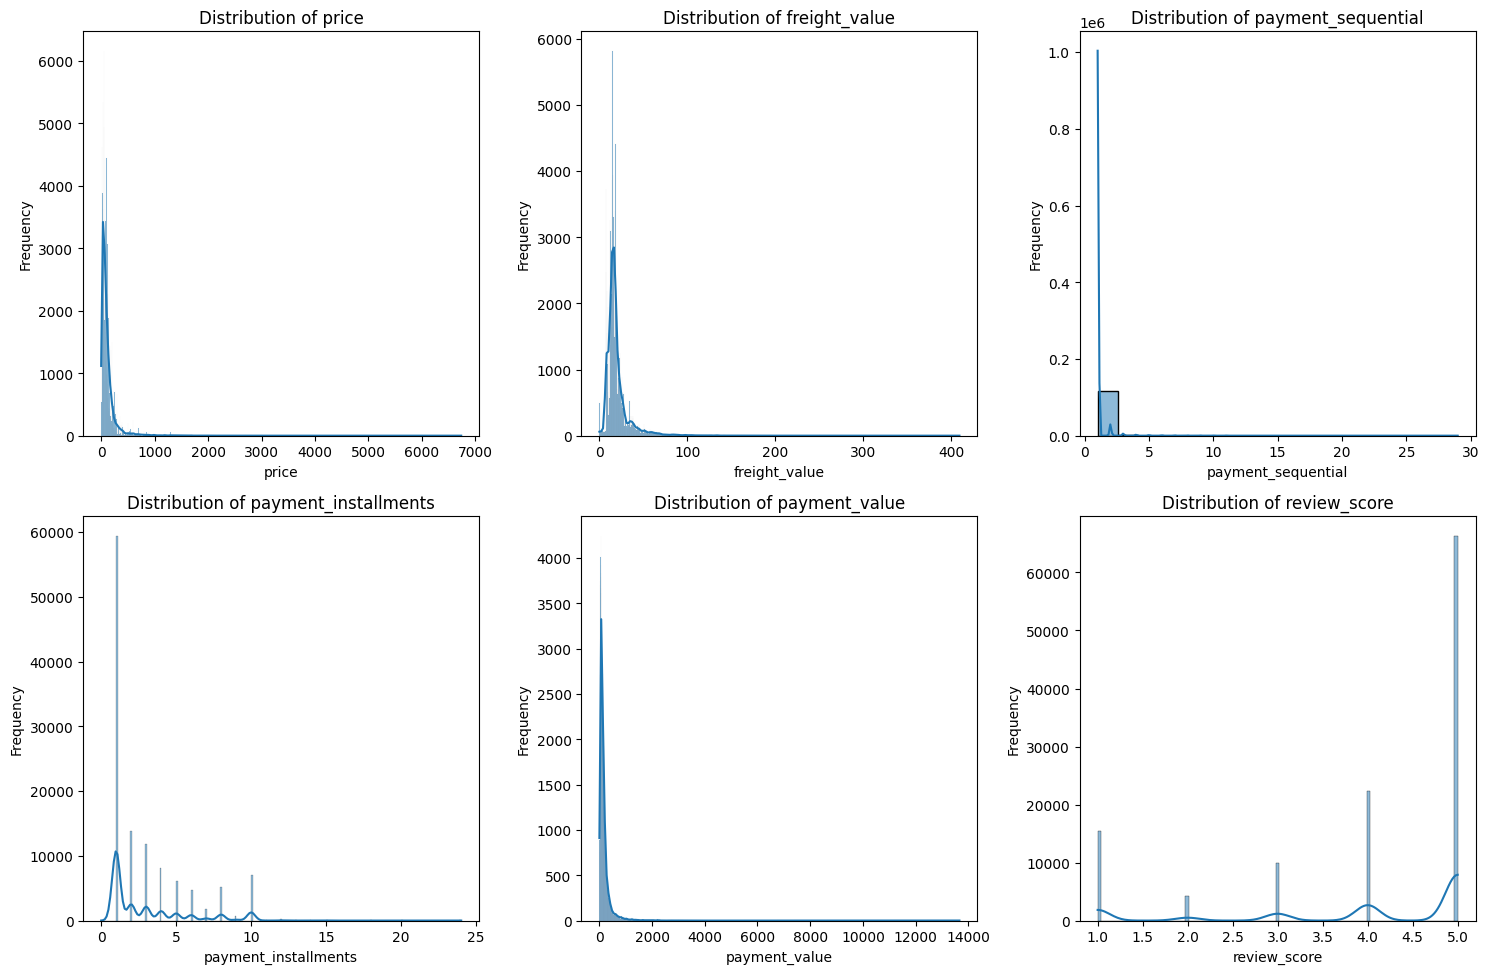

In [56]:
numerical_columns = [col for col in numerical_columns if col != 'order_item_id']

n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(df_olist_raw[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off axes for any unused subplots
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


    2.3.5. Data Correlation

To understand the correlation between numerical features and the target, a correlation test between features was conducted. Since all numerical features are not normally distributed, the correlation test will use the 'Spearman' correlation. The range of correlation test results is from -1 to 1.[reference](https://www.scribbr.com/statistics/correlation-coefficient/#:~:text=A%20correlation%20coefficient%20is%20a,variables%20are%20across%20a%20dataset.&text=When%20one%20variable%20changes%2C%20the,change%20in%20the%20same%20direction.)




		
| Correlation coefficient | Correlation strength| Correlation type |
| --- | --- | --- |
|- 0.7 to - 1	| Very strong |	Negative |
|- 0.5 to - 0.7	| Strong | Negative |
| - 0.3 to - 0.5 | Moderate | Negative |
| 0 to - 0.3 | Weak |	Negative |
| 0 | None | Zero |
| 0 to .3 | Weak | Positive |
| 0.3 to .5 | Moderate | Positive |
| 0.5 to 0.7 | Strong | Positive |
| 0.7 to 1 | Very strong | Positive |

In [57]:
correlation_matrix = df_olist_raw[numerical_columns].corr()
correlation_matrix

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score
price,1.000000,0.415938,0.006839,0.277642,0.739236,-0.004492
freight_value,0.415938,1.000000,0.022345,0.185674,0.373762,-0.037013
payment_sequential,0.006839,0.022345,1.000000,-0.086508,-0.064467,-0.005766
payment_installments,0.277642,0.185674,-0.086508,1.000000,0.273647,-0.040446
payment_value,0.739236,0.373762,-0.064467,0.273647,1.000000,-0.082343
review_score,-0.004492,-0.037013,-0.005766,-0.040446,-0.082343,1.000000


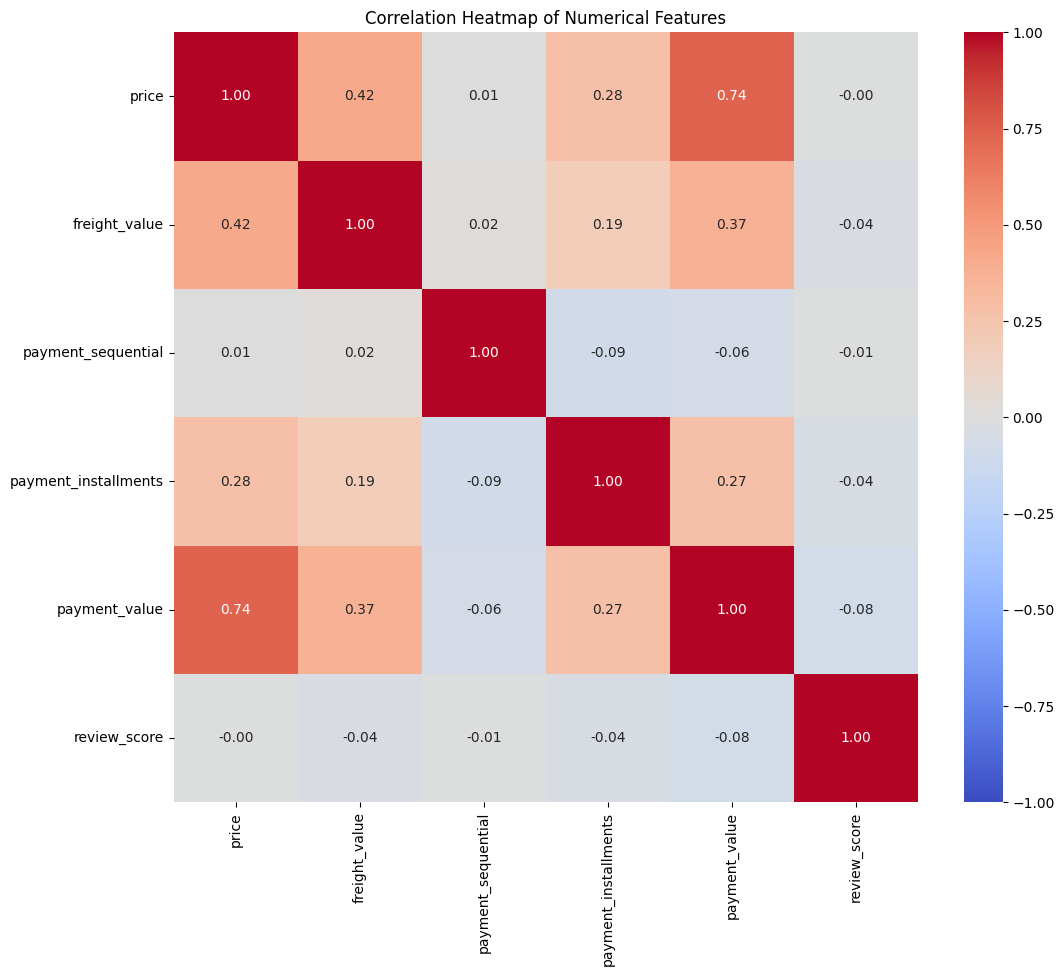

In [58]:
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


- There is a strong positive correlation between the `price` of products and the `payment value`. This indicates that higher-priced items tend to have higher payment values. This relationship is expected as customers pay more for more expensive items.

- There is a moderate positive correlation between `price` and `freight value`. This suggests that as the price of items increases, the shipping cost also tends to increase. This could be due to more expensive items often being larger or heavier, resulting in higher shipping costs.

- A weak positive correlation is observed between `payment installments` and `price`. This implies that customers who buy more expensive items might be more likely to choose installment payments. However, this relationship is not very strong.

- There is a moderate positive correlation between `payment value` and `freight value`. This indicates that customers who make higher payments also tend to incur higher shipping costs, which aligns with the expectation that higher-value orders typically involve higher freight costs.

- The `review score` shows very weak negative correlations with all other numerical variables. This suggests that review scores are not strongly influenced by `price`, `freight value`, `payment value`, or `payment installments`. The low correlations indicate that customer satisfaction, as measured by `review scores`, does not have a strong linear relationship with these numerical factors.